In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train=pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


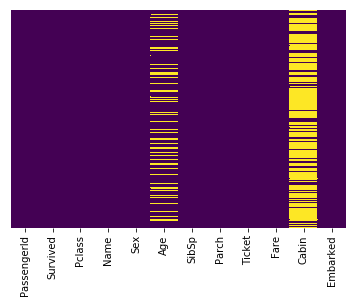

In [11]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [12]:
sns.set_style('whitegrid')

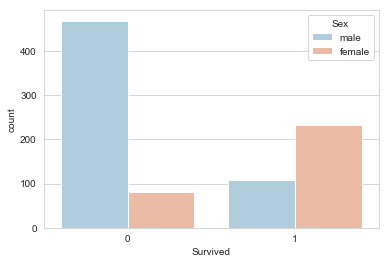

In [17]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

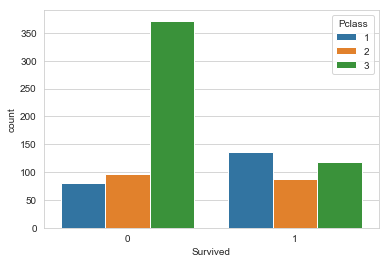

In [18]:
sns.countplot(x='Survived',data=train,hue='Pclass')

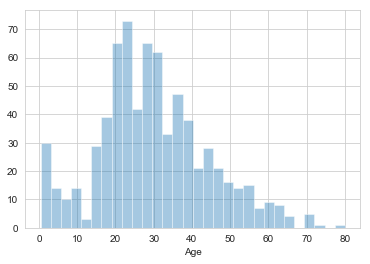

In [24]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

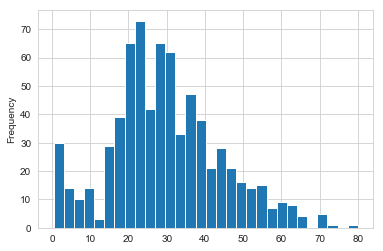

In [26]:
train['Age'].plot.hist(bins=30)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


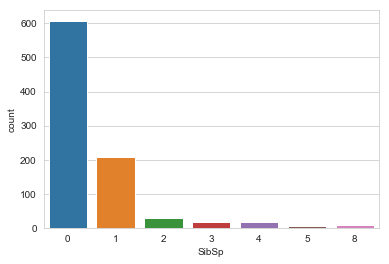

In [28]:
sns.countplot(x='SibSp',data=train)

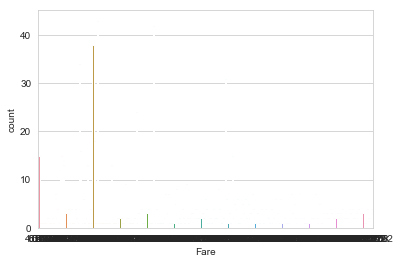

In [29]:
sns.countplot(x='Fare',data=train)

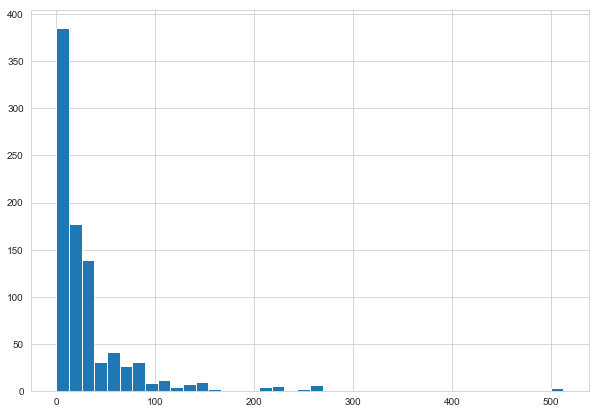

In [33]:
train['Fare'].hist(bins=40,figsize=(10,7))

In [39]:
import cufflinks as cf

In [40]:
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [41]:
#train['Fare'].iplot(kind='hist',bins=30)

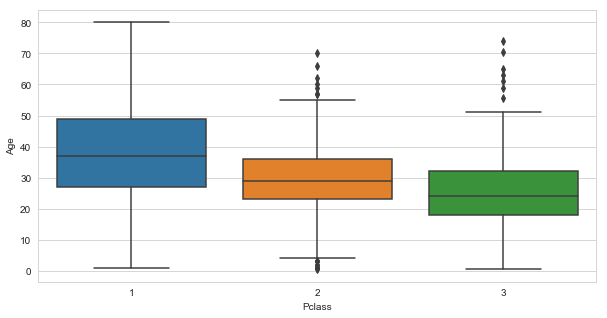

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',data=train)

In [50]:
def imput_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 35
        elif Pclass ==2:
            return  27
        else:
            return 24
    else:
        return Age
    
    

In [51]:
train['Age'] = train[['Age','Pclass']].apply(imput_age, axis=1)

In [53]:
len(train['Age'])

891

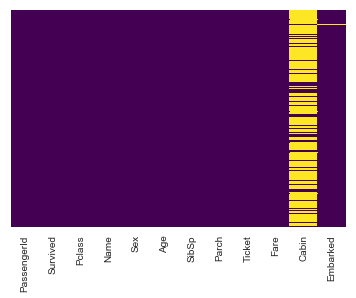

In [59]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [61]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


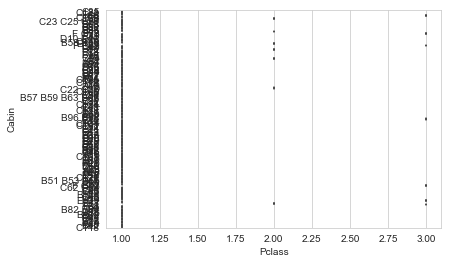

In [63]:
sns.boxplot(x='Pclass',y='Cabin',data=train)

In [64]:
train.dropna(inplace=True)

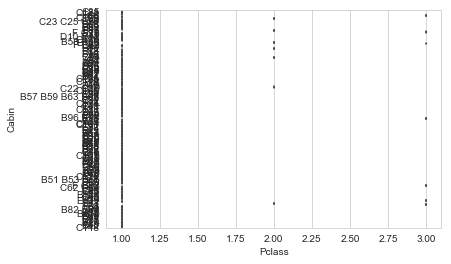

In [65]:
sns.boxplot(x='Pclass',y='Cabin',data=train)

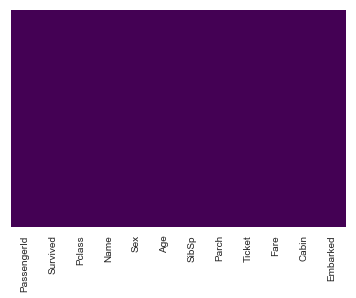

In [67]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')
#train.isnull().head()

In [69]:
train.drop('Cabin',axis=1, inplace=True)

In [70]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S


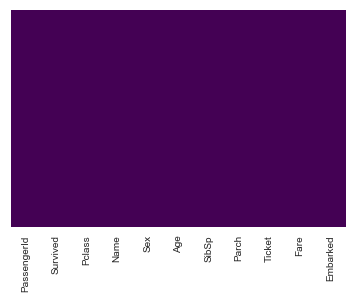

In [71]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [75]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [78]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [79]:
embarked.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [81]:
train=pd.concat([train,sex,embarked],axis=1)

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,16.7000,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,26.5500,0,0,1


In [88]:
#train.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,16.7000,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,26.5500,0,0,1


In [89]:
train.drop('Name',axis=1,inplace=True)

In [90]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1


In [92]:
train.drop('PassengerId',axis=1,inplace=True)

In [93]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


In [94]:
X=train.drop('Survived',axis=1)
y = train['Survived']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
logmodel = LogisticRegression()

In [103]:
logmodel.fit(X_train,y_train)

/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
predictions = logmodel.predict(X_test)

In [105]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.79      0.80      0.80        41

   micro avg       0.72      0.72      0.72        61
   macro avg       0.68      0.68      0.68        61
weighted avg       0.72      0.72      0.72        61



In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(y_test,predictions)

array([[11,  9],
       [ 8, 33]])